# AirBnb Price Prediction
- Understanding problem statement
- Data Collection
- Data Checks
- Exploratory Data Analysis
- Data Pre-processing
- Model Training
- Choose the best model

## 1. Problem Statement

- The project understands how the price of AirBnb properties is affected with variables such location, property type , Bed type, Availability

## 2. Data Collection

- Data Source - https://www.kaggle.com/datasets/joebeachcapital/airbnb
- Dataset consist of 89 columns and 75k records, we be only using relevent columns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [3]:
df = pd.read_csv('airbnb-listings.csv',delimiter=';',low_memory=False,usecols=['Price', 'Smart Location', 'Room Type', 'Property Type', 'Bed Type', 'Availability 365', 'Minimum Nights', 
                 'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy'])

In [4]:
df.columns = [col.replace(" ","").lower() for col in df.columns]

In [5]:
df.head()

,smartlocation,propertytype,roomtype,bedtype,price,minimumnights,availability365,numberofreviews,reviewscoresrating,cancellationpolicy
0,"Amsterdam, Netherlands",Apartment,Entire home/apt,Real Bed,600.0,2.0,74.0,31.0,89.0,strict
1,"Amsterdam, Netherlands",Apartment,Entire home/apt,Real Bed,175.0,2.0,259.0,15.0,99.0,strict
2,"Amsterdam, Netherlands",Apartment,Entire home/apt,Real Bed,125.0,4.0,0.0,1.0,100.0,flexible
3,"Amsterdam, Netherlands",Apartment,Entire home/apt,Real Bed,130.0,3.0,0.0,22.0,97.0,flexible
4,"Amsterdam, Netherlands",Apartment,Entire home/apt,Real Bed,80.0,2.0,326.0,16.0,78.0,moderate


In [6]:
df.tail()

,smartlocation,propertytype,roomtype,bedtype,price,minimumnights,availability365,numberofreviews,reviewscoresrating,cancellationpolicy
494949,"Footscray, Australia",House,Private room,Real Bed,30.0,1.0,0.0,4.0,60.0,moderate
494950,"Yarraville, Australia",House,Private room,Real Bed,42.0,7.0,358.0,9.0,93.0,moderate
494951,"West Footscray, Australia",House,Private room,Real Bed,33.0,3.0,337.0,3.0,100.0,strict
494952,"Footscray, Australia",Apartment,Entire home/apt,Real Bed,62.0,5.0,28.0,0.0,NaN,flexible
494953,"Kingsville, Australia",House,Private room,Real Bed,47.0,2.0,63.0,0.0,NaN,moderate


### 2.2 Data Information
- smartlocation = location of the property i.e. city and country
- propertytype - type of property (house or apartment)
- roomtype - type of room
- bedtype - type of bed
- price - the target column
- minimumnights - minimum nights stays
- availability365 - availablity across year
- numberofreviews - total number of reviews recieved
- reviewscoresrating - rating of reviews
- cancellationpolicy - how rigid are the cancelation policies



In [7]:
## shape of dataset
df.shape

(494954, 10)

### 3. Data Checks
- Missing Values
- Duplicates
- Datatypes of variables
- check number of unique values for each column
- Check Statistics of Dataset
- check various categories present in the categorical columns

### 3.1 Missing Values



In [8]:
df.isnull().mean()

smartlocation         0.000004
propertytype          0.000022
roomtype              0.000002
bedtype               0.000002
price                 0.016078
minimumnights         0.000004
availability365       0.000004
numberofreviews       0.000004
reviewscoresrating    0.258246
cancellationpolicy    0.000004
dtype: float64

#### Observation
- We can see most of the columns have some missing values, we will all missing values

In [9]:
print(f"shape with missing values {df.shape}\n")

df.dropna(inplace=True)

print(f"shape after removing missing values {df.shape}")

shape with missing values (494954, 10)

shape after removing missing values (362420, 10)


### 3.2 Check Duplicates



In [10]:
df.duplicated().sum()

4302

#### Observation
- there are 4302 duplicates, we need to drop

In [11]:
print(f"shape with duplictes {df.shape}\n")

df.drop_duplicates(inplace=True)

print(f"shape after removing duplicates {df.shape}")

shape with duplictes (362420, 10)

shape after removing duplicates (358118, 10)


### 3.3 Check Data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358118 entries, 0 to 494951
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   smartlocation       358118 non-null  object 
 1   propertytype        358118 non-null  object 
 2   roomtype            358118 non-null  object 
 3   bedtype             358118 non-null  object 
 4   price               358118 non-null  float64
 5   minimumnights       358118 non-null  float64
 6   availability365     358118 non-null  float64
 7   numberofreviews     358118 non-null  float64
 8   reviewscoresrating  358118 non-null  float64
 9   cancellationpolicy  358118 non-null  object 
dtypes: float64(5), object(5)
memory usage: 30.1+ MB


#### observation
- 5 categorical columns
- 5 numerical columns


### 3.4 Number of unique Values

In [13]:
df.nunique()

smartlocation         4970
propertytype            41
roomtype                 3
bedtype                  5
price                  888
minimumnights          136
availability365        366
numberofreviews        451
reviewscoresrating      70
cancellationpolicy      11
dtype: int64

### 3.5 Check Statistics

In [42]:
df.describe(percentiles=[.1,.25,.5,.65,.75,.8,.95,.98]).T

,count,mean,std,min,10%,25%,50%,65%,75%,80%,95%,98%,max
price,358118.0,134.582015,144.995684,0.0,37.0,55.0,90.0,120.0,150.0,170.0,450.0,690.0,999.0
minimumnights,358118.0,3.433927,104.870469,1.0,1.0,1.0,2.0,2.0,3.0,3.0,7.0,14.0,60000.0
availability365,358118.0,175.275803,136.284867,0.0,0.0,33.0,169.0,275.0,313.0,329.0,364.0,365.0,365.0
numberofreviews,358118.0,22.899985,36.043492,1.0,1.0,3.0,9.0,17.0,27.0,34.0,93.0,139.0,735.0
reviewscoresrating,358118.0,92.858097,8.550968,20.0,81.0,90.0,95.0,97.0,100.0,100.0,100.0,100.0,100.0


### Observation
- minimumnights has maximum values of 60000, which is not normal as 95% of values are under 7.
- similarly, for numberofreviews 95% falls under 93 but the maximum value is 735.
- availinlity365 has 10% zero values.
- price columns min price is zero.

In [15]:
## define categorical and numerical columns
TARGET = 'price'
categorical_cols = [col for col in df.columns if df[col].dtype == 'O']
numerical_cols = [col for col in df.columns if col not in categorical_cols and col != TARGET]

print(f"TARGET: {TARGET}\n")
print(f"categorical columns: {categorical_cols}")
print(f"length of categorical columns: {len(categorical_cols)}\n")

print(f"numerical colomns: {numerical_cols}")
print(f"length of numerical columns: {len(numerical_cols)}")



TARGET: price

categorical columns: ['smartlocation', 'propertytype', 'roomtype', 'bedtype', 'cancellationpolicy']
length of categorical columns: 5

numerical colomns: ['minimumnights', 'availability365', 'numberofreviews', 'reviewscoresrating']
length of numerical columns: 4


### 3.6 Categories of Categorical columns

In [16]:
for col in categorical_cols:
    print(f"number of categories: {df[col].nunique()}")
    print("Categories of {}: {} \n".format(col,df[col].unique()))
    

number of categories: 4970
Categories of smartlocation: ['Amsterdam, Netherlands' 'Antwerpen, Belgium' 'Antwerp, Belgium' ...
 'Es Carregador, Spain' 'villa verde bajo, Spain' 'Centro, Spain'] 

number of categories: 41
Categories of propertytype: ['Apartment' 'House' 'Bed & Breakfast' 'Condominium' 'Boat' 'Villa'
 'Townhouse' 'Loft' 'Other' 'Cabin' 'Boutique hotel' 'Bungalow'
 'Camper/RV' 'Dorm' 'Hostel' 'Serviced apartment' 'Guesthouse' 'Castle'
 'Guest suite' 'Tent' 'Entire Floor' 'Chalet' 'Ryokan (Japan)' 'Timeshare'
 'Earth House' 'Hut' 'Treehouse' 'Lighthouse' 'Igloo' 'Yurt' 'Train'
 'Vacation home' 'Cave' 'Tipi' 'Island' 'In-law' 'Casa particular' 'Plane'
 'Nature lodge' 'Parking Space' 'Heritage hotel (India)'] 

number of categories: 3
Categories of roomtype: ['Entire home/apt' 'Private room' 'Shared room'] 

number of categories: 5
Categories of bedtype: ['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch'] 

number of categories: 11
Categories of cancellationpolicy: ['strict

### observation 
- smartlocation has 4970 unique categories,which is to be dealt.
- similarly propertype has 41 unique values and some of them doesnot look right.


## 4) Exploratory Data Analysis


In [17]:
df.head()

,smartlocation,propertytype,roomtype,bedtype,price,minimumnights,availability365,numberofreviews,reviewscoresrating,cancellationpolicy
0,"Amsterdam, Netherlands",Apartment,Entire home/apt,Real Bed,600.0,2.0,74.0,31.0,89.0,strict
1,"Amsterdam, Netherlands",Apartment,Entire home/apt,Real Bed,175.0,2.0,259.0,15.0,99.0,strict
2,"Amsterdam, Netherlands",Apartment,Entire home/apt,Real Bed,125.0,4.0,0.0,1.0,100.0,flexible
3,"Amsterdam, Netherlands",Apartment,Entire home/apt,Real Bed,130.0,3.0,0.0,22.0,97.0,flexible
4,"Amsterdam, Netherlands",Apartment,Entire home/apt,Real Bed,80.0,2.0,326.0,16.0,78.0,moderate


- ***TARGET***


<Axes: xlabel='price', ylabel='Count'>

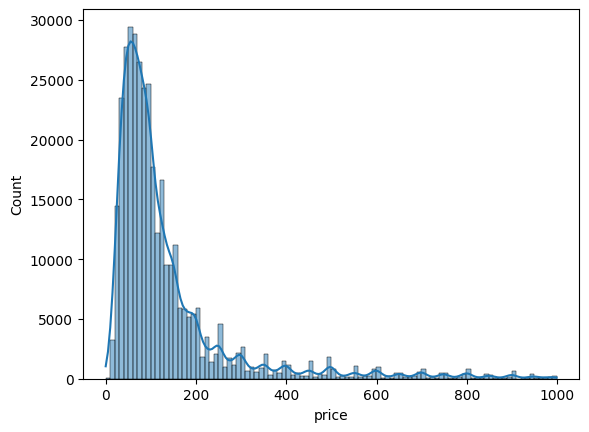

In [18]:
sns.histplot(df[TARGET],kde=True,bins=100)


In [19]:
df['propertytype'].value_counts()/df.shape[0]


propertytype
Apartment                 0.719269
House                     0.184850
Bed & Breakfast           0.022596
Condominium               0.020569
Loft                      0.013370
Townhouse                 0.011669
Other                     0.006417
Villa                     0.003870
Guesthouse                0.003479
Bungalow                  0.002653
Dorm                      0.002538
Boat                      0.002008
Cabin                     0.001759
Chalet                    0.000804
Camper/RV                 0.000698
Hostel                    0.000676
Boutique hotel            0.000665
Serviced apartment        0.000656
Timeshare                 0.000274
Guest suite               0.000209
Tent                      0.000209
Treehouse                 0.000134
Castle                    0.000123
Vacation home             0.000078
Earth House               0.000078
Hut                       0.000061
In-law                    0.000059
Yurt                      0.000056
Tipi   

### Observation
- for propertytype has almost 72% apartments and 18% house, and for others the contribution are very low.
- this can droped or sumarised as apartment and house.

In [20]:
df.groupby(['roomtype','propertytype']).aggregate('count')

smartlocation  bedtype   price  \
roomtype        propertytype                                      
Entire home/apt Apartment               181929   181929  181929   
                Bed & Breakfast            701      701     701   
                Boat                       519      519     519   
                Boutique hotel              53       53      53   
                Bungalow                   750      750     750   
...                                        ...      ...     ...   
Shared room     Tent                         4        4       4   
                Timeshare                    2        2       2   
                Townhouse                   56       56      56   
                Treehouse                    2        2       2   
                Villa                       14       14      14   

                                 minimumnights  availability365  \
roomtype        propertytype                                      
Entire home/apt Apartment               181929           181929   
                Bed & Breakfast            701              701   
                Boat                       519              519   
                Boutique hotel              53               53   
                Bungalow                   750              750   
...                                        ...              ...   
Shared room     Tent                         4                4   
                Timeshare                    2                2   
                Townhouse                   56               56   
                Treehouse                    2                2   
                Villa                       14               14   

                                 numberofreviews  reviewscoresrating  \
roomtype        propertytype                                           
Entire home/apt Apartment                 181929              181929   
                Bed & Breakfast              701                 701   
                Boat                         519                 519   
                Boutique hotel                53                  53   
                Bungalow                     750                 750   
...                                          ...                 ...   
Shared room     Tent                           4                   4   
                Timeshare                      2                   2   
                Townhouse                     56                  56   
                Treehouse                      2                   2   
                Villa                         14                  14   

                                 cancellationpolicy  
roomtype        propertytype                         
Entire home/apt Apartment                    181929  
                Bed & Breakfast                 701  
                Boat                            519  
                Boutique hotel                   53  
                Bungalow                        750  
...                                             ...  
Shared room     Tent                              4  
                Timeshare                         2  
                Townhouse                        56  
                Treehouse                         2  
                Villa                            14  

[101 rows x 8 columns]

In [60]:
df.drop('propertytype',axis=1,inplace=True)

In [21]:
df['roomtype'].value_counts()

roomtype
Entire home/apt    232117
Private room       120183
Shared room          5818
Name: count, dtype: int64

bedtype
Real Bed         0.964193
Pull-out Sofa    0.021487
Futon            0.007858
Couch            0.004018
Airbed           0.002443
Name: count, dtype: float64


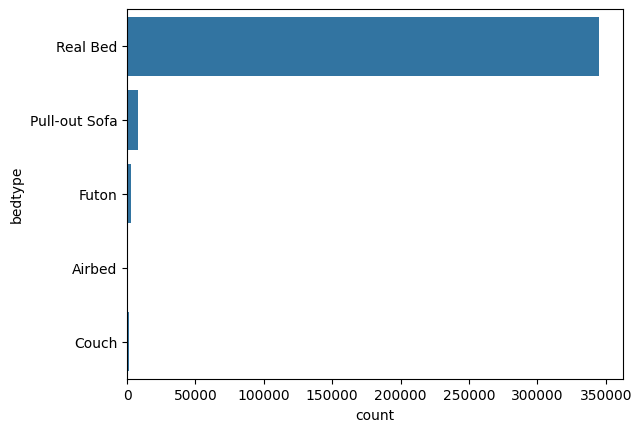

In [22]:
sns.countplot(df.bedtype)
print(df.bedtype.value_counts()/df.shape[0])

### observation 
- 96% of the bedtype are real type, which means the variable has very low variance.

In [23]:
df.drop(['bedtype'],inplace=True,axis=1)
categorical_cols.remove('bedtype')

cancellationpolicy
strict                 146377
moderate               101149
flexible                86394
moderate_new             9682
strict_new               8439
flexible_new             5529
super_strict_30           289
super_strict_60           218
super_strict_30_new        21
super_strict_60_new        15
no_refunds                  5
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='cancellationpolicy'>

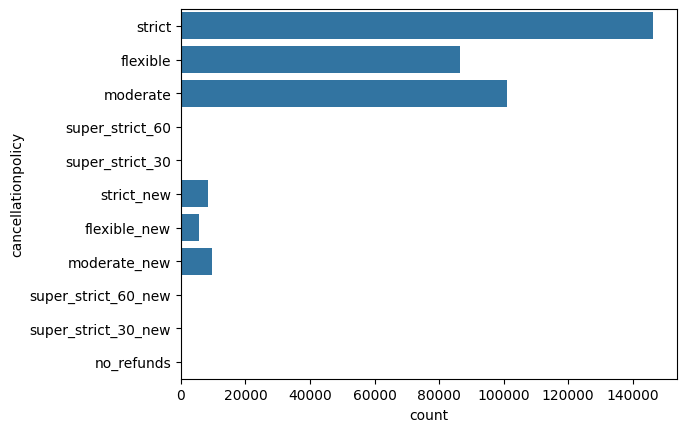

In [24]:
print(df.cancellationpolicy.value_counts())
sns.countplot(df.cancellationpolicy)

In [25]:
strict = r'\b\w*strict\w*\b'
flexible = r'\b\w*flexible\w*\b'
moderate = r'\b\w*moderate\w*\b'
df['cancellationpolicy'] = df['cancellationpolicy'].apply(lambda x:re.sub(strict,'strict',x))
df['cancellationpolicy'] = df['cancellationpolicy'].apply(lambda x:re.sub(flexible,'flexible',x))
df['cancellationpolicy'] = df['cancellationpolicy'].apply(lambda x:re.sub(moderate,'moderate',x))

df['cancellationpolicy'].value_counts()


cancellationpolicy
strict        155359
moderate      110831
flexible       91923
no_refunds         5
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='cancellationpolicy'>

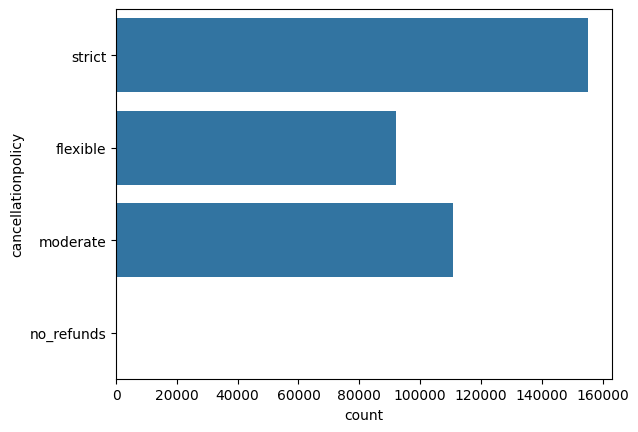

In [26]:
sns.countplot(df['cancellationpolicy'])

### observation
- cancellationpolicy can be summarised as strict, flexible, moderate, no refunds.

### Numerical Columns

In [27]:
# for col in numerical_cols:
#     sns.histplot(df[col])
#     plt.show()

<Axes: xlabel='reviewscoresrating', ylabel='Count'>

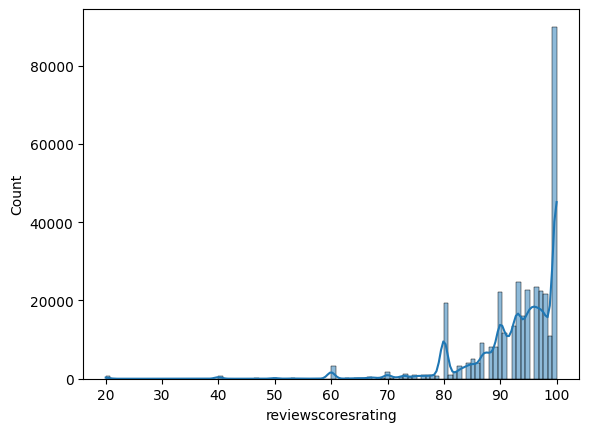

In [38]:
sns.histplot(data=df,x='reviewscoresrating',bins=100,kde=True)

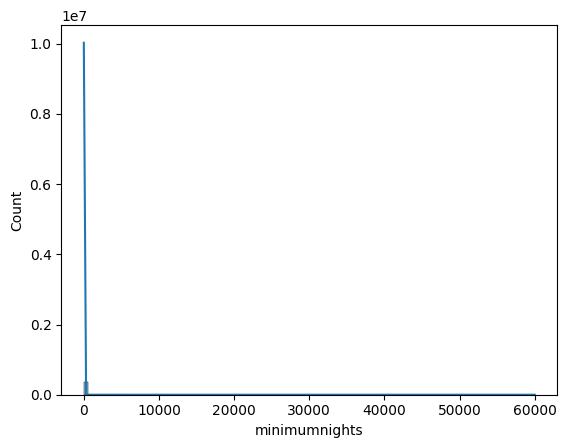

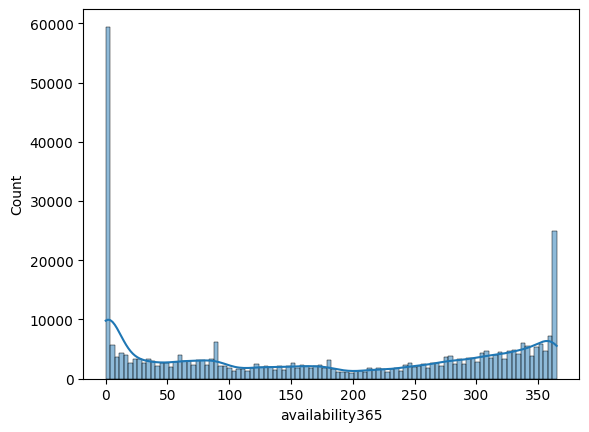

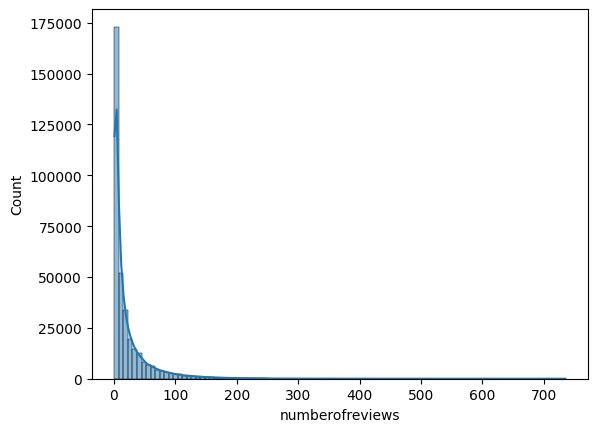

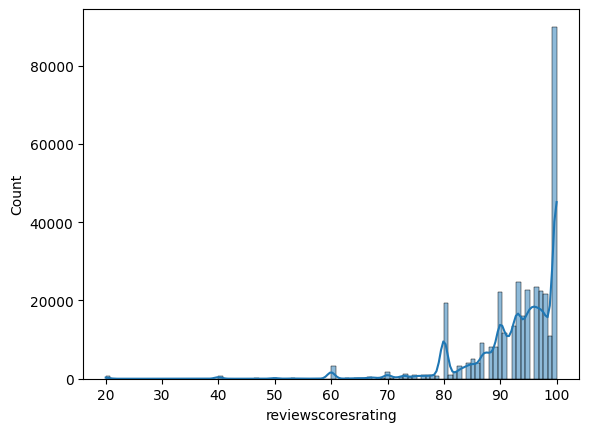

In [40]:
for col in numerical_cols:
    sns.histplot(data=df, x=col, bins=100, kde=True)
    plt.show()

In [48]:
## removing extreme values from minimumnights and numberofreviews
print(f"shape with extreme values: {df.shape}\n")

df = df.query("minimumnights <= 14 and numberofreviews <= 150")


print(f"shape after deleting extreme values: {df.shape}")

shape with extreme values: (345372, 9)

shape after deleting extreme values: (345372, 9)


In [49]:
df.head()

,smartlocation,propertytype,roomtype,price,minimumnights,availability365,numberofreviews,reviewscoresrating,cancellationpolicy
0,"Amsterdam, Netherlands",Apartment,Entire home/apt,600.0,2.0,74.0,31.0,89.0,strict
1,"Amsterdam, Netherlands",Apartment,Entire home/apt,175.0,2.0,259.0,15.0,99.0,strict
2,"Amsterdam, Netherlands",Apartment,Entire home/apt,125.0,4.0,0.0,1.0,100.0,flexible
3,"Amsterdam, Netherlands",Apartment,Entire home/apt,130.0,3.0,0.0,22.0,97.0,flexible
4,"Amsterdam, Netherlands",Apartment,Entire home/apt,80.0,2.0,326.0,16.0,78.0,moderate


In [57]:
df['smartlocation'] = df['smartlocation'].apply(lambda x: x.split(",")[0])

In [58]:
df.head()

,smartlocation,propertytype,roomtype,price,minimumnights,availability365,numberofreviews,reviewscoresrating,cancellationpolicy
0,Amsterdam,Apartment,Entire home/apt,600.0,2.0,74.0,31.0,89.0,strict
1,Amsterdam,Apartment,Entire home/apt,175.0,2.0,259.0,15.0,99.0,strict
2,Amsterdam,Apartment,Entire home/apt,125.0,4.0,0.0,1.0,100.0,flexible
3,Amsterdam,Apartment,Entire home/apt,130.0,3.0,0.0,22.0,97.0,flexible
4,Amsterdam,Apartment,Entire home/apt,80.0,2.0,326.0,16.0,78.0,moderate


In [61]:
df.to_csv("train.csv",index=False)